# Community Detection

Communities, alternatively referred to as clusters or modules, are groups of vertices that most likely share similar attributes and/or perform similar functions in the graph. These are tightly connected clusters of nodes that are only loosely connected to other clusters. In this chapter, we will discuss different clustering and community detection techniques. 


## Applying Standard Clustering Methods

**Hierarchical (agglomerative) clustering** of a social-network graph starts by combining some two nodes that are connected by an edge. Successively, edges that are not between two nodes of the same cluster would be chosen randomly to combine the clusters to which their two nodes belong. The choices would be random, because all distances represented by an edge are the same.

In **k-means (point assignment) approach** we will pick  k starting nodes at random. Then assign each node to the cluster with the shortest average distance to all the nodes of the cluster. If we pick two starting nodes at random, they might both be in the same cluster. We can start with one randomly chosen node and then pick another as far away as
possible, or we could pick any pair of nodes not connected by an edge. 

To illustrate these clustering methods, we will use a benchmark network, the karate club graph. 

### Example 1

In [1]:
from sklearn import cluster
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from alis import graph_to_edge_matrix, draw_communities
import warnings
warnings.filterwarnings('ignore')

G = nx.karate_club_graph()
pos = nx.spring_layout(G)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hjclhc4k because the default path (/home/rroxasvillanueva/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Here, we convert the graph to its adjacency matrix.

In [2]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

We determine the cluster labels of each node through k-means and agglomerative  clustering techniques.

In [3]:
k_clusters = 2
results = []
algorithms = {}

algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")
algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

In [4]:
nmi_results = []
ars_results = []
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true_val = list(y_true)

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

To visualize the result, we show here the detected communities.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


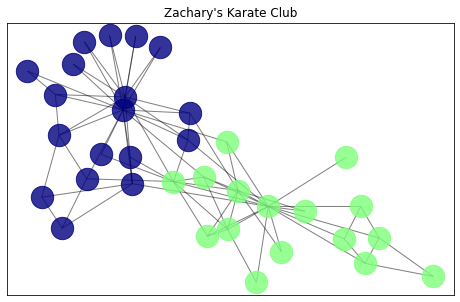

In [5]:
draw_communities(G, algorithms['agglom'].labels_, pos)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


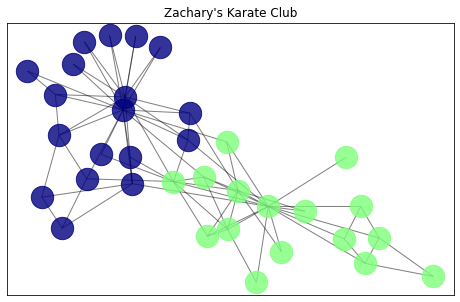

In [6]:
draw_communities(G, algorithms['kmeans'].labels_, pos)

#### Limitations 

1. The number of clusters/ communities should be known beforehand.
2. The time complexity of a naive agglomerative clustering is $\mathcal {O}(n^{3})$ because we exhaustively scan the $N x N$ matrix dist_mat for the lowest distance in each of $N-1$ iterations. Using priority queue data structure we can reduce this complexity to $\mathcal {O}(n^{2}\log{n})$. By using some more optimizations it can be brought down to $\mathcal {O}(n^{2})$. For k-means, the average complexity is given by O(k n T), where n is the number of samples and T is the number of iteration. 

## Girvan-Newman Algorithm

The Girvan–Newman algorithm identifies communities by gradually removing edges from the original network. The communities are the connected components of the network. The Girvan–Newman algorithm focuses on the fact that the edge with the highest betweenness centrality are more probable to be "between" communities.

The Girvan-Newman Algorithm is as follows:

1. Calculate the betweenness for all edges in the network.
2. Remove the edge with the highest betweeness.
3. Recalculate betweeness for all edges affected by the removal.
4. Repeat from step 2 until the desired number of clusters was obtained.

We will again use the karate club graph for this example. 

### Example 2

In [7]:
from girvan_newman import *
import itertools

k = 2
com = []
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    com = communities
    print(tuple(sorted(c) for c in communities))
    

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9])


The output of the Girvan-Newman are the list nodes belonging to each cluster. We can also visualize the result below. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


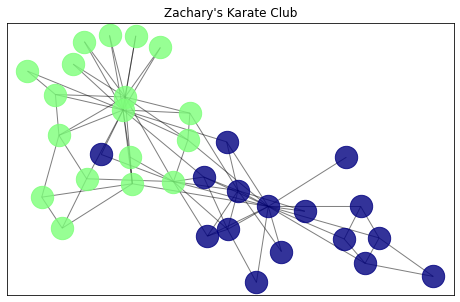

In [8]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_pred = np.zeros(G.number_of_nodes())

for i in range(k):
    if i == 0:
        for j in com[i]:
            y_pred[j] = 0
    elif i == 1:
        for j in com[i]:
            y_pred[j] = 1
            
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

draw_communities(G, y_pred, pos)

In [9]:
dif = np.sum(np.abs(y_pred-y_true))
dif

2.0

Note that two nodes at the boundary of the communities were incorrectly labeled.

#### Limitations

1. Time to calculate the betweenness for all m edges in a graph of n nodes is $\mathcal {O}(mn)$. Since this calculation has to be repeated once for the removal of each edge, the entire algorithm runs in worst-case time $\mathcal {O}(m^{2}n)$.
2. Cannot place individuals in two different communities.
3. Everyone is assigned to a community.

## Direct Discovery of Communities

In this section, we shall discuss a technique for discovering communities directly by looking for subsets of the nodes that have a relatively large number of edges among them. Interestingly, the technique for doing this search on a large graph involves finding large frequent itemsets.

### Finding Cliques

We could find sets of nodes with many edges between them by finding a large clique (a set of nodes with edges between any two of them). However, that task is not easy. Finding the largest clique in a graph is NP-complete problem, so most of these algorithms have an exponential running time. 


### Example 3

The code below lists all cliques in the given graph. Shown in {numref}`cliques` are some of the detected cliques by the algorithm.

In [10]:
cliques = list(nx.algorithms.clique.find_cliques(G))
print (cliques)

[[0, 1, 17], [0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [0, 1, 19], [0, 1, 21], [0, 4, 10], [0, 4, 6], [0, 5, 10], [0, 5, 6], [0, 8, 2], [0, 11], [0, 12, 3], [0, 31], [1, 30], [2, 32, 8], [2, 9], [2, 27], [2, 28], [5, 16, 6], [33, 32, 8, 30], [33, 32, 14], [33, 32, 15], [33, 32, 18], [33, 32, 20], [33, 32, 22], [33, 32, 23, 29], [33, 32, 31], [33, 9], [33, 13], [33, 19], [33, 26, 29], [33, 27, 23], [33, 28, 31], [24, 25, 31], [24, 27], [25, 23]]


```{figure} ./images/cliques.png
:name: cliques
:width: 300px

Sample cliques in the karate club graph
```


## Partitioning of Graphs

In this section, we examine another approach to organizing social-network graphs. We use some important tools from matrix theory (“spectral methods”) to formulate the problem of partitioning a graph to minimize the number of edges that connect different components. 

### Normalized Cut

Given a graph, we would like to divide the nodes into two sets so that the cut, or set of edges that connect nodes in different sets is minimized. However, we also want to constrain the selection of the cut so that the two sets are approximatelyequal in size. 

```{figure} ./images/normcut.png
:name: normcut
:width: 300px

What is a "good" cut?
```

A proper definition of a “good” cut must balance the size of the cut itself against the difference in the sizes of the sets that the cut creates. One choice that serves well is the “normalized cut.” First, define the volume of a set S of nodes, denoted $Vol(S)$, to be the number of edges with at least one end in S. Suppose we partition the nodes of a graph into two disjoint sets S and T . Let $Cut(S, T)$ be the number of edges that connect a node in S to a node in T.
Then the normalized cut value for S and T is 

<center> $\frac{Cut(S,T)}{Vol(S)}+\frac{Cut(S,T)}{Vol(T)}$ </center>

A small value of normalized cut signifies a "good" partition.


### Example 4

Consider {numref}`normcut`.If we choose the smallest cut, S = {b} and T = {a, c, d, e, f, g}, this will give us $Cut(S, T)$ = 1 and $Vol(S)$ = 1 because there is only one edge connected to b. $Vol(T)$ = 9 because all of the edges have at least one end at a node of set T. The normalized cut for this partition is 1/1 + 1/9 = 1.11.

For the preferred cut which consist of the edges (a,d) and (c,f), S = {a, b, c} and T = {d, e, f, g}. $Cut(S, T)$ = 2, $Vol(S)$ = 4  and $Vol(T)$ = 7. Then, the normalized cut is 2/4 + 2/7 = 0.79. 

### Spectral Methods

We can get a good idea of the best way to partition a graph from the eigenvalues and eigenvectors of its Laplacian matrix. The Laplacian L has several advantageous mathematical features. L is symmetric and contains only elements with real values. As a result, it possesses real eigenvalues and orthogonal eigenvectors with real entries. Additionally, L is positive semidefinite, which means that its eigenvalues are not negative. The second eigenvalue is denoted by the Fiedler value, and the associated vector is denoted by the Fiedler vector. These contain information on the graph's topology. The Fiedler value approximates the smallest graph cut necessary to partition the graph into two connected components. Here, nodes are classified into two clusters based on whether their associated Fiedler vector entry is greater than or less than the specified threshold r. Thus, the value of r has an effect on the quality of clusters. 0 and the median value of the Fiedler vector are often used values for r. Each value in the Fiedler vector denotes which side of the cut the node is located on. 

### Example 5

Here, we again use the adjacency matrix of the karate club graph. We also determine the degree matrix, which is just the diagonal of the edge matrix. Then, we calculate the Laplacian matrix which is the difference of the degree and the adjacency matrix. Next, determine the eigenvalues and eigenvectors of the Laplacian matrix. 
In the given example below, the negative eigenvectors correspond to cluster 0 and the positive values correspond to cluster 1. 

In [11]:
# Adjacency matrix
A = edge_mat

# Degree matrix
D = np.diag(A.sum(axis=1))

# Laplacian matrix
L = D-A

# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

clus = np.zeros(len(vecs[:,1]))

for i in range(len(vecs[:,1])):
    if vecs[i,1] > 0:
        clus[i] = 1
    else:
        clus[i] = 0

print (vecs[:,1])
print (clus)

[-0.11213743 -0.04128789  0.02321896 -0.05549978 -0.28460453 -0.32372722
 -0.32372722 -0.052586    0.05160128  0.09280089 -0.28460453 -0.21099295
 -0.1094613  -0.01474197  0.16275078  0.16275078 -0.42276533 -0.10018142
  0.16275078 -0.01363713  0.16275078 -0.10018142  0.16275078  0.15569457
  0.15302558  0.16096292  0.18710956  0.12766405  0.0951523   0.16765031
  0.07349964  0.09875343  0.13034546  0.11890326]
[0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Finding Overlapping Communities

In social networks, it is possible that one person is a member of two or more communities. In this section, we will discuss an algorithm on finding overlapping communities. Given a social graph, we expect edges to be denser in the intersection of communities as illustrated in {numref}`club`.  

```{figure} ./images/club.png
:name: club
:width: 400px

The overlap of two communities is denser than the nonoverlapping parts of these communities.
```

One algorithm on finding overlapping communities take advantage of this information. Here, the nodes are ordered according to some criterion, for example decreasing Page Rank, and then processed sequentially according to this ordering. A node is added to any cluster if adding it improves the cluster density. If the node is not added to any cluster, it creates a new cluster. Note that every node is in at least one cluster. Clusters that are too small to be relevant to the particular application can be dropped. {cite:ps}`baumes2005efficient`

In [12]:
from LA import *
from IS2 import *

clust = LA(G)
final_clusters = []
    # Run the second part of algorithm
for clustr in clust:
    final_clusters.append(IS2(clustr, G))
    # Remove duplicate cluster
final_without_duplicates = []
for fc in final_clusters:
    fc = sorted (fc)
    if fc not in final_without_duplicates:
        final_without_duplicates.append(fc)

In [13]:
final_without_duplicates

[[0, 1, 2, 3, 7, 8, 13, 19, 23, 27, 28, 29, 30, 31, 32, 33],
 [0, 1, 2, 3, 7, 13],
 [0, 4, 5, 6, 10, 16],
 [0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33],
 [0, 1, 2, 3, 7, 8, 13, 19, 28, 30, 31, 32, 33]]

{numref}`overlapcom` shows some of the overlapping communities detected.

```{figure} ./images/overlapcom.png
:name: overlapcom
:width: 600px

Sample overlapping communities in the karate club graph
```

## Summary

We discussed different methods on community detection in social network graphs. Standard clustering methods, such as hierarchical (agglomerative) and point assignment (k-means) approaches, for community detection were then explored. Direct discovery of communities through finding cliques, partitioning of graphs through spectral methods and finding overlapping communities were also discussed. The methods presented here may be applied not just to social networks but to other kind of networks as well, such as biological, technological and ecological networks. 

## Exercise

```{figure} ./images/exercise3.png
:name: exercise3
:width: 400px

Sample graph
```

1. Determine the "best" cut for the given graph in {numref}`exercise3` by calculating the normalized cut.    

2. Apply partitioning by spectral analysis to the graph in {numref}`exercise3`. Determine the adjacency matrix, Laplacian matrix, the second eigenvector and cluster labels. 
